# Let's try now with the big file


import matplotlib.pyplot as plt
from PIL import Image

image = Image.open("candle_extracted/candle/Data/Images/Anomaly/000.JPG")
plt.imshow(image)
plt.axis("off")
plt.show()


In [26]:
import os
from codecarbon import track_emissions
import numpy as np
import torch
from PIL import Image
from transformers import AutoModelForImageClassification, AutoFeatureExtractor

# Chemin racine de vos données (à adapter)
extract_path = "VisA_20220922_extracted"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Chargement du feature extractor et du modèle
feature_extractor = AutoFeatureExtractor.from_pretrained("microsoft/resnet-50")
model = AutoModelForImageClassification.from_pretrained("microsoft/resnet-50")
model.to(device)
model.eval()

def load_and_preprocess_image(img_path):
    """
    Charge et prétraite une image en utilisant le feature extractor.
    """
    image = Image.open(img_path).convert("RGB")
    inputs = feature_extractor(images=image, return_tensors="pt")
    return inputs["pixel_values"]

@track_emissions()
def extract_features(image_paths):
    """
    Extrait des caractéristiques pour chaque image de la liste image_paths.
    Ici, on utilise les logits du modèle comme représentation.
    """
    features = []
    with torch.no_grad():
        for img_path in image_paths:
            image_tensor = load_and_preprocess_image(img_path).to(device)
            outputs = model(pixel_values=image_tensor)
            # Dans ce cas, nous utilisons les logits comme vecteur de caractéristiques.
            feature_vector = outputs.logits.cpu().numpy()
            features.append(feature_vector)
    return np.vstack(features)

# Charger les images normales depuis le dossier "Normal"
normal_dir = os.path.join(extract_path, "candle", "Data", "Images", "Normal")

# Récupérer tous les fichiers images du dossier "Normal"
normal_image_paths = [
    os.path.join(normal_dir, filename)
    for filename in os.listdir(normal_dir)
    if filename.lower().endswith(('.jpg', '.jpeg', '.png'))
]

# Vérifier que des images ont bien été trouvées
if not normal_image_paths:
    raise FileNotFoundError(f"Aucune image trouvée dans le dossier {normal_dir}")

# Extraire les caractéristiques pour les images normales
normal_features = extract_features(normal_image_paths)

# Sauvegarder les caractéristiques extraites pour l'inférence
np.save("normal_features.npy", normal_features)
print("Caractéristiques normales sauvegardées dans 'normal_features.npy'")


/usr/local/lib/python3.11/dist-packages/transformers/models/convnext/feature_extraction_convnext.py:28: FutureWarning: The class ConvNextFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ConvNextImageProcessor instead.
  warnings.warn(
[codecarbon INFO @ 09:57:59] [setup] RAM Tracking...
[codecarbon INFO @ 09:57:59] [setup] CPU Tracking...
[codecarbon WARNING @ 09:57:59] No CPU tracking mode found. Falling back on CPU constant mode. 
 Linux OS detected: Please ensure RAPL files exist at \sys\class\powercap\intel-rapl to measure CPU

[codecarbon WARNING @ 09:58:00] We saw that you have a Intel(R) Xeon(R) CPU @ 2.20GHz but we don't know it. Please contact us.
[codecarbon INFO @ 09:58:00] CPU Model on constant consumption mode: Intel(R) Xeon(R) CPU @ 2.20GHz
[codecarbon INFO @ 09:58:00] [setup] GPU Tracking...
[codecarbon INFO @ 09:58:00] No GPU found.
[codecarbon INFO @ 09:58:00] >>> Tracker's metadata:
[codecarbon INFO @ 09:58:00]   Platform sys

In [21]:
pip install codecarbon


In [28]:
import pandas as pd

# Ouvrir et afficher le contenu du fichier emissions.csv
emissions_df = pd.read_csv("emissions.csv")
display(emissions_df)


timestamp project_name                                run_id  \
0  2025-02-15T10:02:12   codecarbon  380e3ca2-82db-4172-a670-915f75ca4ac9   

                          experiment_id    duration  emissions  \
0  5b0fa12a-3dd7-45bb-9766-cc326314d9f1  252.051695   0.000944   

   emissions_rate  cpu_power  gpu_power  ram_power  ...  cpu_count  \
0        0.000004       42.5        0.0   4.753039  ...          2   

                        cpu_model  gpu_count  gpu_model longitude latitude  \
0  Intel(R) Xeon(R) CPU @ 2.20GHz        NaN        NaN  -79.9746  32.8608   

  ram_total_size  tracking_mode  on_cloud  pue  
0       12.67477        machine         N  1.0  

[1 rows x 32 columns]

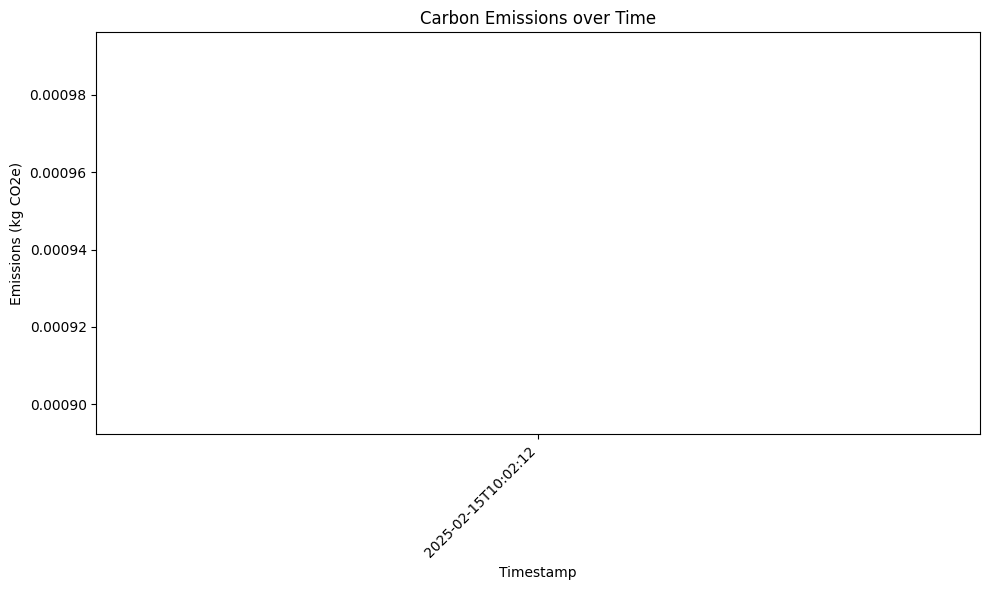

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your emissions_df has 'timestamp' and 'emissions' columns
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.lineplot(x='timestamp', y='emissions', data=emissions_df)
plt.xlabel("Timestamp")
plt.ylabel("Emissions (kg CO2e)")
plt.title("Carbon Emissions over Time")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

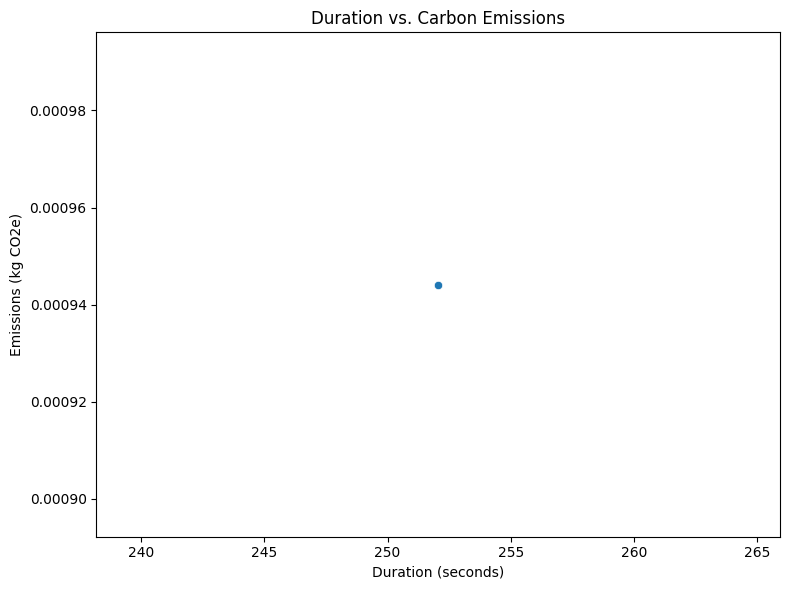

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='duration', y='emissions', data=emissions_df)
plt.xlabel("Duration (seconds)")
plt.ylabel("Emissions (kg CO2e)")
plt.title("Duration vs. Carbon Emissions")
plt.tight_layout()
plt.show()


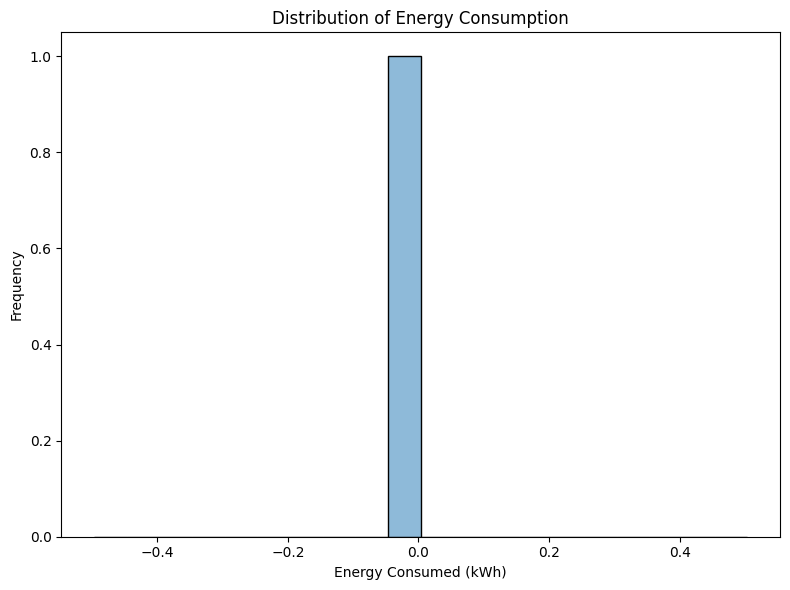

In [31]:
plt.figure(figsize=(8, 6))
sns.histplot(emissions_df['energy_consumed'], bins=20, kde=True)  # Assuming 'energy_consumed' column
plt.xlabel("Energy Consumed (kWh)")
plt.ylabel("Frequency")
plt.title("Distribution of Energy Consumption")
plt.tight_layout()
plt.show()